<h3 align="right">mCP, &nbsp; dSPN, &nbsp; 150602_c1_D1, &nbsp; animal_1_n33_04102017_cel2 </h3>

# Model selection

## Model data

In [33]:
import cell_model, cell_evaluator
morphofile = 'morphology/animal_1_n33_04102017_cel2.swc'
parameters = cell_model.define_parameters('parameters.json')
mechanisms = cell_model.define_mechanisms('mechanisms.json')
protocols = cell_evaluator.define_protocols('protocols.json')
calculator = cell_evaluator.define_fitness_calculator(protocols, 'features.json')
expdata = {
    'IV_356.soma.v': 'expdata/ECall_IV_ch3_356.dat',
    'IV_364.soma.v': 'expdata/ECall_IV_ch3_364.dat',    
    'IDthresh-sub_398.soma.v': 'expdata/ECall_IDthresh_ch3_398.dat',    
    'IDthresh_400.soma.v': 'expdata/ECall_IDthresh_ch3_400.dat',    
    'IDthresh_402.soma.v': 'expdata/ECall_IDthresh_ch3_402.dat',    
    'IDthresh_410.soma.v': 'expdata/ECall_IDthresh_ch3_410.dat',    
}

## Simulation environment

In [34]:
%matplotlib notebook
import matplotlib.pyplot as plt

In [35]:
import json
import pandas
import efel
import numpy as np
import bluepyopt as bpopt
import bluepyopt.ephys as ephys

In [36]:
from utils import *

In [37]:
%%capture
!rm -rf x86_64
!nrnivmodl mechanisms

## Cell model definition

In [38]:
morphology = ephys.morphologies.NrnFileMorphology(
    morphofile, do_replace_axon=True)

In [39]:
cell = ephys.models.CellModel(
    'dspn', 
    morph=morphology, 
    mechs=mechanisms, 
    params=parameters)
print (cell)

dspn:
  morphology:
    morphology/animal_1_n33_04102017_cel2.swc
  mechanisms:
    pas.all: pas at ['all']
    naf.somatic: naf at ['somatic']
    kaf.somatic: kaf at ['somatic']
    kas.somatic: kas at ['somatic']
    kdr.somatic: kdr at ['somatic']
    kir.somatic: kir at ['somatic']
    cal12.somatic: cal12 at ['somatic']
    cal13.somatic: cal13 at ['somatic']
    can.somatic: can at ['somatic']
    car.somatic: car at ['somatic']
    cadyn.somatic: cadyn at ['somatic']
    caldyn.somatic: caldyn at ['somatic']
    sk.somatic: sk at ['somatic']
    bk.somatic: bk at ['somatic']
    Im.somatic: Im at ['somatic']
    naf.axonal: naf at ['axonal']
    kas.axonal: kas at ['axonal']
    Im.axonal: Im at ['axonal']
    naf.basal: naf at ['basal']
    kaf.basal: kaf at ['basal']
    kas.basal: kas at ['basal']
    kdr.basal: kdr at ['basal']
    kir.basal: kir at ['basal']
    cal12.basal: cal12 at ['basal']
    cal13.basal: cal13 at ['basal']
    car.basal: car at ['basal']
    cat32.ba

In [40]:
opt_params = [p.name for p in cell.params.values() if not p.frozen]
opt_bounds = [p.bounds for p in cell.params.values() if not p.frozen]
for x in sorted(opt_params): print (x)

g_pas.axonal
g_pas.basal
g_pas.somatic
gbar_Im.axonal
gbar_Im.somatic
gbar_bk.basal
gbar_bk.somatic
gbar_kaf.basal
gbar_kaf.somatic
gbar_kas.axonal
gbar_kas.basal
gbar_kas.somatic
gbar_kdr.basal
gbar_kdr.somatic
gbar_kir.basal
gbar_kir.somatic
gbar_naf.axonal
gbar_naf.basal
gbar_naf.somatic
gbar_sk.basal
gbar_sk.somatic


## Cell evaluator

In [41]:
simulator = ephys.simulators.NrnSimulator()

In [42]:
evaluator = ephys.evaluators.CellEvaluator(
    cell_model=cell,
    param_names=opt_params,
    fitness_protocols=protocols,
    fitness_calculator=calculator,
    sim=simulator)

## Optimisation results

In [43]:
with open('log.json') as fp:
    log = json.load(fp)

<IPython.core.display.Javascript object>


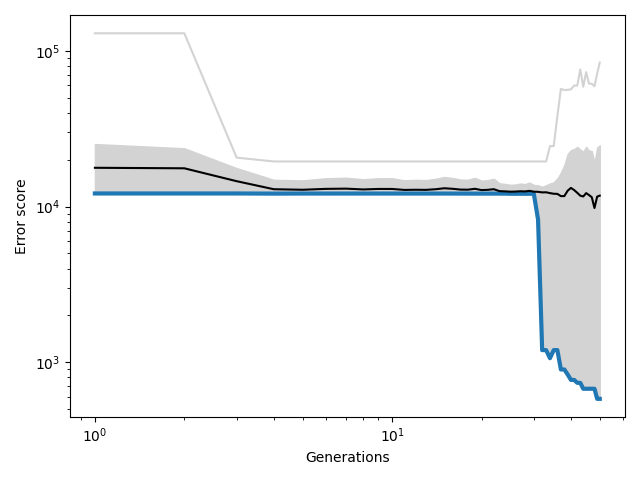

In [44]:
plot_log(log)

In [45]:
best_models = json.load(open('best_models.json'))
pandas.options.display.float_format = '{:,.4g}'.format
bm = pandas.DataFrame(best_models)
bm.T

,0,1,2,3,4,5,6,7,8,9
g_pas.axonal,0.01385,0.01921,0.01082,0.009028,0.01727,0.01556,0.01605,0.01062,0.01154,0.008
g_pas.somatic,4.592e-05,1.014e-05,0.0001939,0.0008526,7.599e-05,2.649e-05,4.592e-05,4.592e-05,1.028e-05,3.549e-05
g_pas.basal,0.0005683,0.0004077,0.0004744,0.0004031,0.0003014,0.0003915,0.0005916,0.0005901,0.0005437,0.0005479
gbar_naf.axonal,0.8622,3.338,2.148,1.447,0.2499,0.3085,0.5562,0.8622,0.205,0.2127
gbar_kas.axonal,0.1138,0.1063,0.1495,0.1907,0.1205,0.126,0.1194,0.1224,0.1176,0.134
gbar_Im.axonal,0.1376,0.1161,0.1206,0.1107,0.1066,0.09214,0.1218,0.1376,0.1186,0.147
gbar_naf.somatic,10.85,13.01,11.4,10.77,11.69,11.93,15.85,11.7,11.58,15.22
gbar_kaf.somatic,0.2472,0.8622,0.2387,0.1879,0.4582,0.4213,0.5542,0.2472,0.2762,0.4913
gbar_kas.somatic,0.001043,0.0006295,0.001485,0.0002448,0.02234,0.00893,0.0001258,0.001043,0.005243,0.005684
gbar_kdr.somatic,0.001986,0.001687,0.001535,0.001629,0.001571,0.00153,0.001996,0.001892,0.001991,0.001878


<IPython.core.display.Javascript object>


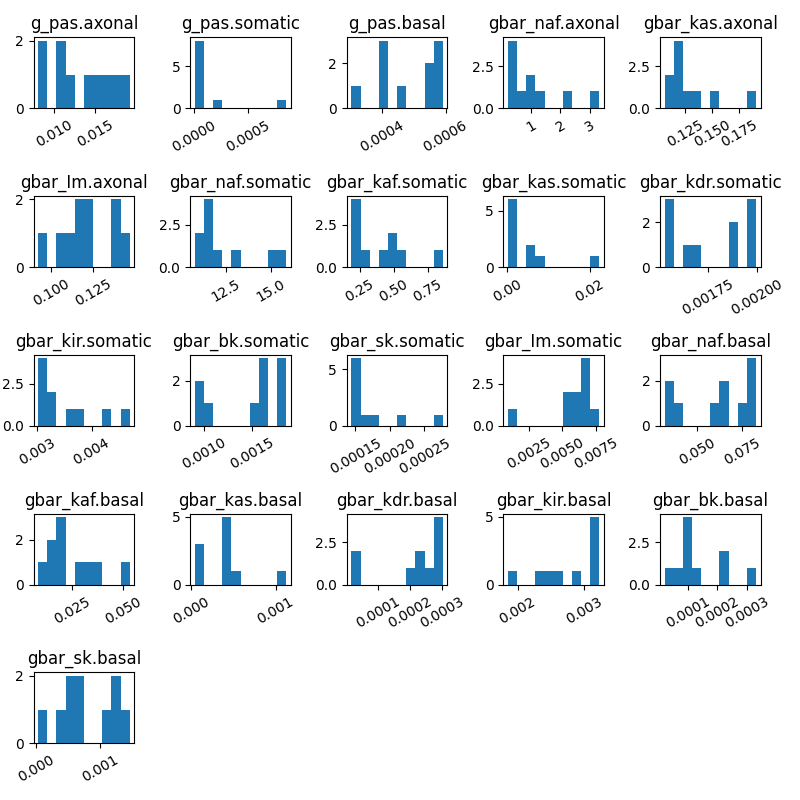

In [46]:
axs = bm.hist(grid=False, xrot=30, figsize=(8,8))
plt.tight_layout();

<IPython.core.display.Javascript object>


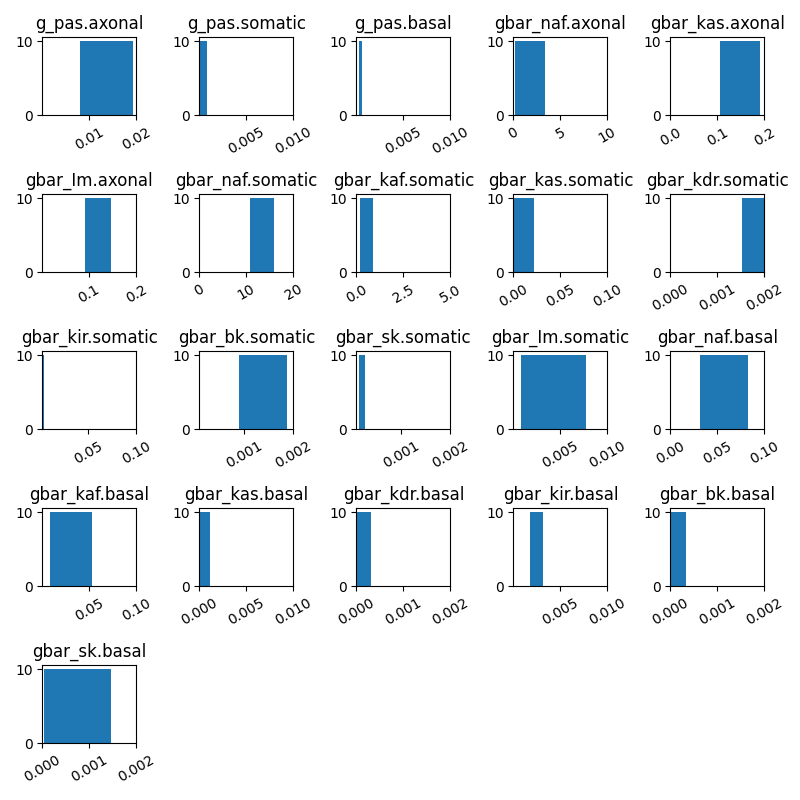

In [47]:
axs = bm.hist(bins=1, grid=False, xrot=30, figsize=(8,8))
for ax, bounds in zip(axs.flatten(), opt_bounds):
        ax.set_xlim(bounds)
plt.tight_layout();

In [48]:
evaluate_all = True
best_objectives = []
if evaluate_all:
    for params in best_models:
        objectives = evaluator.evaluate_with_dicts(params)
        best_objectives.append(objectives)
    df = pandas.DataFrame(best_objectives).T
    df = df.sort_index(axis=0, ascending=False)

<IPython.core.display.Javascript object>


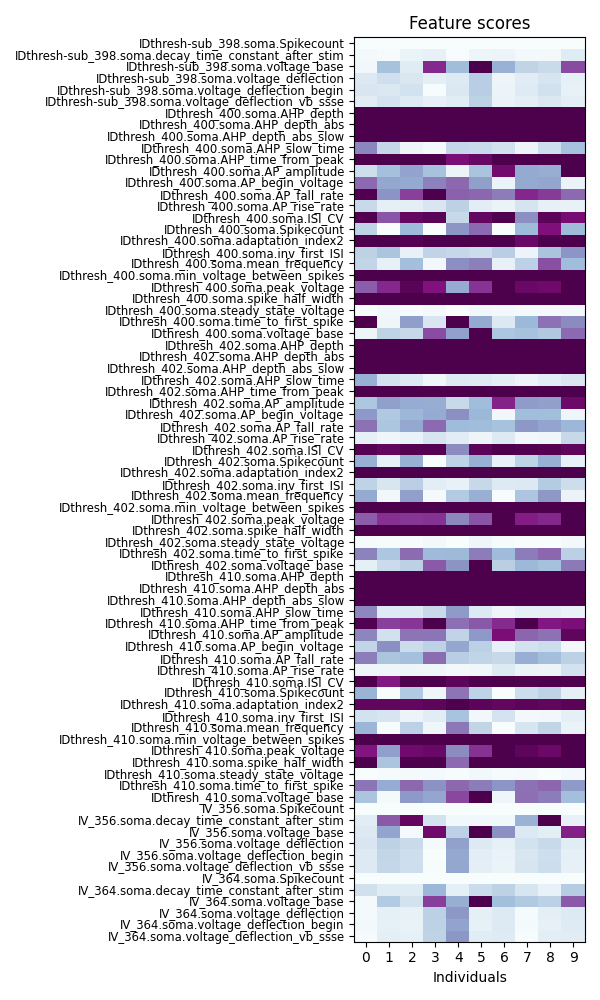

In [49]:
if evaluate_all:
    plot_scores(df, figsize=(6, 10), vmin=0, vmax=10)

## Single-cell simulation

In [50]:
ind = 0
test_parameters = best_models[ind]

In [51]:
test_responses = evaluator.run_protocols(
    protocols=protocols.values(), 
    param_values=test_parameters)

<IPython.core.display.Javascript object>


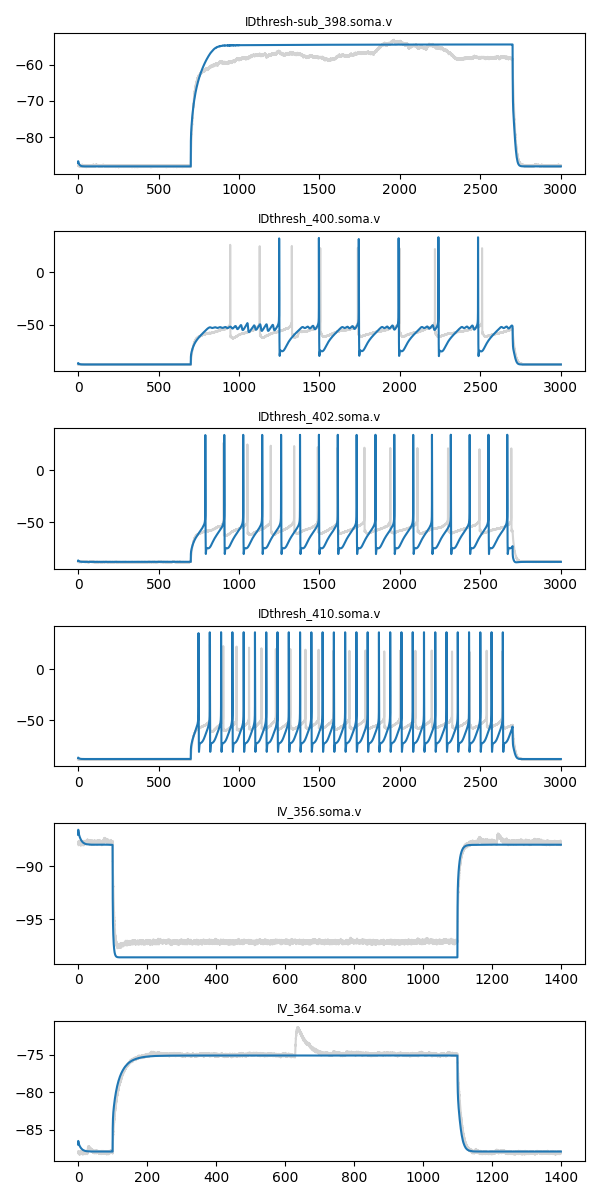

In [52]:
plot_responses(test_responses, expdata=expdata, junction_potential=11.5, figsize=(6,12))

<IPython.core.display.Javascript object>


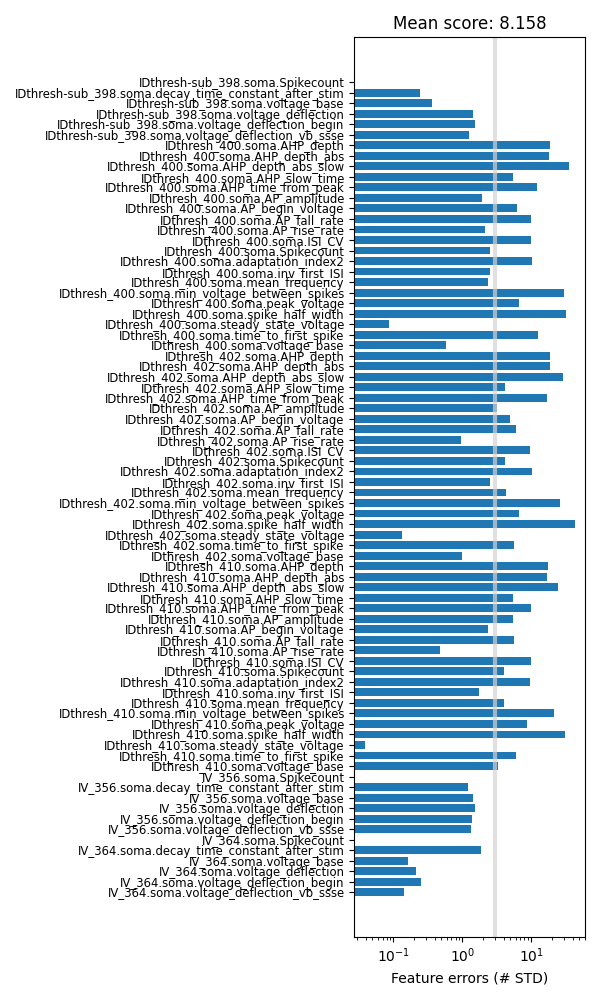

In [53]:
if evaluate_all:
    objectives = best_objectives[ind]
else:
    objectives = evaluator.evaluate_with_dicts(test_parameters)
plot_objectives(objectives, figsize=(6,10))

In [54]:
from numpy.linalg import norm
d = []
for i in range(len(best_models)):
    v = []
    for j in range(len(best_models)):
        p1 = np.array([best_models[i][p] for p in sorted(best_models[i])])
        p2 = np.array([best_models[j][p] for p in sorted(best_models[j])])
        v.append(norm((p1-p2)/(p1+p2)))
    d.append(v)
df = pandas.DataFrame(data=np.round(d,2))
def highlight_low(x):
    def c(v):
        r = int(v/x.max()*255)
        g = int(v/x.max()*128)+127
        b = 255
        return '#%02x%02x%02x' % (r, g, b)
    return ['background-color: %s' % c(v) for v in x]
df.style.apply(highlight_low)

,0,1,2,3,4,5,6,7,8,9
0,0.000000,2.070000,1.490000,1.890000,1.830000,1.750000,1.390000,1.050000,1.590000,1.810000
1,2.070000,0.000000,2.000000,1.980000,1.990000,1.920000,1.850000,1.800000,1.910000,2.110000
2,1.490000,2.000000,0.000000,1.490000,1.720000,1.570000,1.540000,1.090000,1.630000,1.730000
3,1.890000,1.980000,1.490000,0.000000,2.110000,2.030000,1.760000,1.680000,2.020000,2.190000
4,1.830000,1.990000,1.720000,2.110000,0.000000,0.930000,1.570000,1.580000,1.550000,1.560000
5,1.750000,1.920000,1.570000,2.030000,0.930000,0.000000,1.480000,1.430000,1.240000,1.410000
6,1.390000,1.850000,1.540000,1.760000,1.570000,1.480000,0.000000,0.960000,1.350000,1.520000
7,1.050000,1.800000,1.090000,1.680000,1.580000,1.430000,0.960000,0.000000,1.190000,1.420000
8,1.590000,1.910000,1.630000,2.020000,1.550000,1.240000,1.350000,1.190000,0.000000,1.230000
9,1.810000,2.110000,1.730000,2.190000,1.560000,1.410000,1.520000,1.420000,1.230000,0.000000


In [55]:
hall_of_fame = []
selected = range(10)
for model in selected:
    hall_of_fame.append(best_models[model])
with open('hall_of_fame.json', 'w') as fp:
    json.dump(hall_of_fame, fp, indent=4, sort_keys=True)